In [8]:
import sys
!{sys.executable} -m pip install camb

In [10]:
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
#Assume installed from github using "git clone --recursive https://github.com/cmbant/CAMB.git"
#This file is then in the docs folders
camb_path = os.path.realpath(os.path.join(os.getcwd(),'..'))
sys.path.insert(0,camb_path)
import camb
from camb import model, initialpower
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.3.5 installed at C:\Users\lenovo\anaconda3\lib\site-packages\camb


(0.6240116891601439, 0.11232210404882591)
0.7747015529483188
Note: redshifts have been re-sorted (earliest first)
[0.06451786 0.06715734 0.07002137 0.07313973 0.07654764 0.0802871
 0.08440854 0.08897303 0.09405522 0.09974718 0.10616373 0.11344967
 0.12178978 0.13142299 0.14266226 0.15592292 0.17176239 0.19093388
 0.2144514  0.24364192]
(0.7009976806982701, 0.12617958252568862)
0.5417132599792489
Note: redshifts have been re-sorted (earliest first)
[0.06756727 0.07033564 0.07334025 0.07661257 0.08018994 0.0841169
 0.08844708 0.09324556 0.09859214 0.10458561 0.11134974 0.11904152
 0.12786289 0.1380775  0.15003543 0.16420981 0.18125222 0.20207686
 0.22798632 0.26084736]
(0.3913148643811446, 0.07043667558860603)
0.8844742784500026
Note: redshifts have been re-sorted (earliest first)
[0.05552973 0.05778325 0.0602254  0.06288047 0.06577697 0.06894859
 0.07243533 0.07628504 0.08055524 0.08531549 0.09065042 0.09666343
 0.10348123 0.11125918 0.1201868  0.13049216 0.14244166 0.15632773
 0.172430

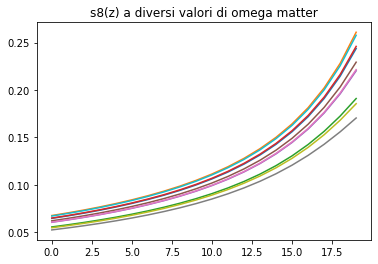

  (10, 20)
  [[1.         0.99999993 0.99999965 0.99999909 0.99999811 0.99999651
  0.99999399 0.99999014 0.99998433 0.99997564 0.99996275 0.99994375
  0.99991607 0.99987653 0.99982197 0.99975139 0.99967116 0.99960454
  0.99960149 0.99972367]
 [0.99999993 1.         0.9999999  0.99999954 0.99999879 0.99999745
  0.99999526 0.99999179 0.99998642 0.99997827 0.99996601 0.99994777
  0.99992101 0.99988253 0.99982919 0.99975994 0.999681   0.99961533
  0.99961233 0.99973269]
 [0.99999965 0.9999999  1.         0.99999987 0.99999938 0.99999836
  0.99999653 0.99999349 0.99998864 0.9999811  0.99996958 0.99995222
  0.9999265  0.99988925 0.9998373  0.99976957 0.99969212 0.99962755
  0.9996246  0.99974286]
 [0.99999909 0.99999954 0.99999987 1.         0.99999982 0.99999916
  0.99999775 0.99999521 0.99999096 0.99998413 0.99997345 0.99995711
  0.9999326  0.99989677 0.99984644 0.99978047 0.99970474 0.99964144
  0.99963854 0.99975439]
 [0.99999811 0.99999879 0.99999938 0.99999982 1.         0.99999976
  0

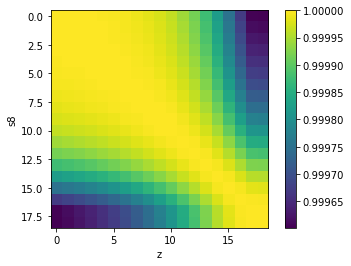

In [22]:
matrice_sigma8 = []

#chiama camb e calcola s8
pars0 = camb.CAMBparams()
def var_da_somma(somma):
    dm = somma/1.18
    bm=dm*0.18
    return dm,bm

for i in range(10):   
    somma = np.random.uniform(0.1,1.0)
    print(var_da_somma(somma))
    
    bm, dm =var_da_somma(somma)      
    h = np.random.uniform(0.5,1.0)  
    print(h)
    H0=67.5
    h=H0/100
    pars0.set_cosmology(H0=H0, ombh2=bm*h**2, omch2=dm*h**2)
    pars0.InitPower.set_params(ns=0.965)
#Note non-linear corrections couples to smaller scales than you want
    redshifts= np.linspace(0,3,20)
    pars0.set_matter_power(redshifts, kmax=2.0)

#Linear spectra
    pars0.NonLinear = model.NonLinear_none
    results = camb.get_results(pars0)
#kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)
    s80 = np.array(results.get_sigma8())
    print(results.get_sigma8())
    matrice_sigma8.append(s80)
matrice_sigma8=np.array(matrice_sigma8) 
plt.plot(matrice_sigma8.T)
plt.title('s8(z) a diversi valori di omega matter')
plt.show()
#differenze relative o rispetto a media
#al posto di H0 cambio densità materia tenendo cost rapporto con  CDM e considero H0 squared
plt.xlabel('z');
plt.ylabel('s8');
#plt.legend(['H0 standard','H0+10%', 'H0-10%'], loc='upper left');

#salvo i risultati
#risultati =[]
#risultati.append(results.get_sigma8())
#print(risultati)
sigma8_corr=np.corrcoef(matrice_sigma8.T)
print(" ", np.shape(matrice_sigma8))
print(" ", sigma8_corr)
#import append
#results.append(s80)
#results.append(s80)
#converto results in array
#arr=[results]
#x=np.arr=[risultati]


#cov e corr su tutto
from matplotlib.colors import LogNorm
dx, dy= 0.015, 0.05
y,x = np.mgrid[slice(0.2,1.0 + dy, dy),
               slice(0.2,1.0 + dx, dx)]
z = (sigma8_corr)
z=z[:-1, :-1]
z_min, z_max = -np.abs(z).max(), np.abs(z).max()
#c = plt.imshow(z, cmap ='Greens', vmin=z_min, vmax=z_max,
 #               extent =[x.min(), x.max(), y.min(), y.max()], 
  #                 interpolation = 'nearest' , origin ='lower')

c=plt.imshow(z)
plt.colorbar(c)
plt.show()
#print(risultati)
